<a href="https://colab.research.google.com/github/22Shivani22/Unsupervised-Learning/blob/main/Unsupervised_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name: NETFLIX MOVIES AND TV SHOWS CLUSTERING**

**UNSUPERVISED ML Project Done by SHIVANI YADAV**

**Done Individually**

# **Project Summary**
Firstly I have imported the important libraries required for the analysis. After that i have uploaded the csv file.Then i have got the first look of my dataset from which i got to know that the given dataset consists of 7787 rows and 12 columns.Then I have printed the shape of given dataset.Then i have printed the rows and columns count. Then by using the info method i got my dataset information.After that i have checked the dupliactes and the missing values in the dataset and i found that the dataset does not consists of duplicates values but it consists of missing values. Then i have ploted the heat map for missing values count.The director column has highest number of missing value of 2389. And the rating column has lowest number of missing value of 7.Then by using the descibe method i have printed the description of the given dataset, then i have explained the each of the variables of the dataset.Then i have checked the unique values for each columns.Then i have performed data wrangling for handling the missing values.Then i have performed feature engineering and then i ahve data visualization in which i have plotted 5 charts to show the relationship between the variables.Then i have done the data preprocessing in which i have removed the stopwords , non ascii values and performed tokenization, vectorization.Then at last i have implemented two ML models i.e Kmeans clustering, Hierarchical clustering.A content based recommender system was build using the similarity matrix obatined after using cosine similarity.This recommender system will make 10 recommendation to the user based on the type of the show they watched.

# **GitHub Link**

 # **Problem Statement**

 This dataset consists of TV shoes and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can be also provide many interesting findings.

# **Let's Begin**

# **Know your data**

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')


# **Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Netflix movies and  TV show clustering data
database = ('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
Netflix_Movies = pd.read_csv(database)

# **Dataset First Look**

In [ ]:
#Let's have first look on our datase
Netflix_Movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
#Importing first 5 rows of our dataset
Netflix_Movies.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#Importing last 5 rows of our dataset
Netflix_Movies.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
#Length of our datset
len(Netflix_Movies)

7787

In [ ]:
#Let's know the shape of our dataset
Netflix_Movies.shape

(7787, 12)

# **Rows and Columns Count**

In [ ]:
#Rows and Columns count of our datset
print(Netflix_Movies.index)
print(Netflix_Movies)
print(Netflix_Movies.columns)

RangeIndex(start=0, stop=7787, step=1)
     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge 

# **Information of the dataset**

In [ ]:
#Info of our dataset
Netflix_Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **Duplicate Values**

In [ ]:
#Duplicate Values in our datset
len(Netflix_Movies[Netflix_Movies.duplicated()])

0

# **Missing Values/ Null Values**

In [ ]:
#Finding the count of missing values or null values of our dataset
print(Netflix_Movies.isnull().sum().sort_values(ascending= False))

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64


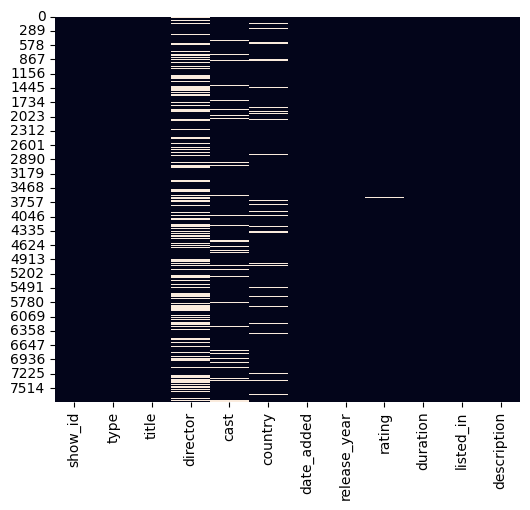

In [ ]:
#Checking null value by plotting Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(Netflix_Movies.isnull(), cbar=False)
plt.show()

# **What did you know about your dataset?**



* The given dataset consists of 7787 rows and 12 columns.
* The datatypes present in the dataset int(64) and object.


* There are no duplicate value present in the dataset.
* The dataset consists of missing values. The director column has highest number of missing value of 2389. And the rating column has lowest number of missing value of 7.



# **Understanding Your Variables**

In [ ]:
#Dataset Columns
print(Netflix_Movies.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
#Dataset Describe
Netflix_Movies.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


# **Variables Description**

**1. show_id-** Unique ID for every movie or TV show.

**2. type-** identifier: A movie or A TV show.

**3. title-** Title of movie or TV show.

**4. director-** Direcor of the show.

**5.cast-** Actors involved.

**6.Country-** Country of production.

**7. date_added-** The date on which the movie or the tv show was added on netflix.

**8. release_year-** Actual release year of the show.

**9. rating-** TV rating of the show.

**10. duration-** Total duration in minutes or number of seasons.

**11. listed_in-** Genre.

**12. Description:** The summary description.

# **Check Unique Values for each Variable**

In [ ]:
#Check unique values for each variable
for i in Netflix_Movies.columns.tolist():
  print("Number of unique values in", i, "is", Netflix_Movies[i].nunique())

Number of unique values in show_id is 7787
Number of unique values in type is 2
Number of unique values in title is 7787
Number of unique values in director is 4049
Number of unique values in cast is 6831
Number of unique values in country is 681
Number of unique values in date_added is 1565
Number of unique values in release_year is 73
Number of unique values in rating is 14
Number of unique values in duration is 216
Number of unique values in listed_in is 492
Number of unique values in description is 7769


In [ ]:
#Total null values
Netflix_Movies.isnull().sum().sum()

3631

# **Data Wrangling**

In [ ]:
#Handling the missing values
Netflix_Movies[['director','cast','country']]= Netflix_Movies[['director','cast','country']].fillna('unknown')
Netflix_Movies['rating']= Netflix_Movies['rating'].fillna(Netflix_Movies['rating'].mode()[0])
Netflix_Movies.dropna(axis=0, inplace=True)

In [ ]:
#Let's check againc the null values in our dataset
Netflix_Movies.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#Dataset Rows and Columns count
Netflix_Movies.shape

(7777, 12)

# **Feature Engineering**

In [ ]:
#Country in which movies are produced
Netflix_Movies.country.value_counts()

United States                                                   2549
India                                                            923
unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [ ]:
#Genre of shows
Netflix_Movies.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [ ]:
#Choosing the primary country and primary genre to simply the analysis
Netflix_Movies['country']= Netflix_Movies['country'].apply(lambda x: x.split(',')[0])
Netflix_Movies['listed_in']= Netflix_Movies['listed_in'].apply(lambda x: x.split(',')[0])


In [ ]:
#Country in which a movie was produced
Netflix_Movies.country.value_counts()

United States     2877
India              956
United Kingdom     576
unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [ ]:
#Genre of shows
Netflix_Movies.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [ ]:
#Splitting the duration column, and changing the datatype to integer
Netflix_Movies['duration']= Netflix_Movies['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
#Number of seasons for tv shows
Netflix_Movies[Netflix_Movies['type']=='TV Shows'].duration.value_counts()


Series([], Name: duration, dtype: int64)

In [ ]:
#Movie length in minutes
Netflix_Movies[Netflix_Movies['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

Date added column string to Datetime format

In [ ]:
#Typecasting 'date_added' from string to datetime
Netflix_Movies['date_added']=pd.to_datetime(Netflix_Movies['date_added'])

In [ ]:
Netflix_Movies['date_added']= pd.to_datetime(Netflix_Movies['date_added'], errors='coerce')

In [ ]:
#First and last date on which a show was added on Netflix
Netflix_Movies.date_added.min(),Netflix_Movies.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [ ]:
#Adding new attributes month and year of date added
Netflix_Movies['month_added']= Netflix_Movies['date_added'].dt.month
Netflix_Movies['year_added']= Netflix_Movies['date_added'].dt.year
Netflix_Movies.drop('date_added', axis=1, inplace=True)

In [ ]:
#Dataset Rows and Columns
Netflix_Movies.shape

(7777, 13)

In [ ]:
#Dataset Info
Netflix_Movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   int64 
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
 11  month_added   7777 non-null   int64 
 12  year_added    7777 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 850.6+ KB


**Insights Found**
After the variable description i have checked the unique value for each variables. Then done handling of missing values. And filled the NA values with unknown. After handling the missing values the number of rows are now 7770 columns and 12 columns.


# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

# Chart 1

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

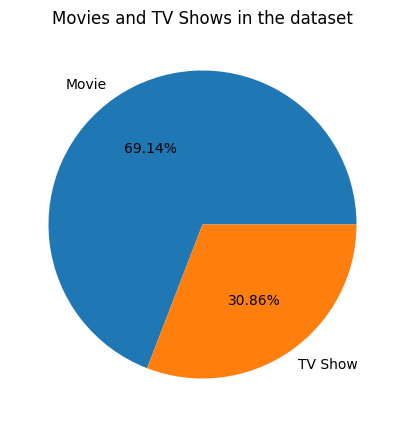

In [ ]:
#Plotting pie chart for getting number of movies and tv shows in the dataset
plt.figure(figsize=(5,5))
Netflix_Movies.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

A pie chart sometimes called a circle chart, is a way of summarizing a set of nominal data or displaying the different values of a given variable.

In the above pie chart i have found that the Movies are more in the dataset with the percentage of 69.14% than that of TV shows which has the percentage of 30.86%.

# Chart 2

Text(0.5, 1.0, 'Top 10 Genres')

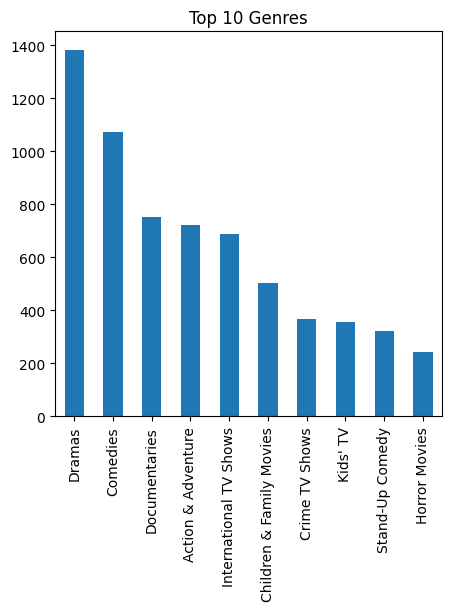

In [ ]:
#Plotting bar graph for top 10 genres
plt.figure(figsize=(5,5))
Netflix_Movies.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Genres')

A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle. The length and heights of the bar chart represent the data distributed in the dataset. In a bar chart, we have one axis representing a particular category of a coulmn in the dataset and another axis representing the values or counts associated with it.

In the above bar plot i have found that dramas are having the large value count, comedies has the second highest value count.

# Chart 3

Text(0.5, 1.0, 'Ratings for the TV shows')

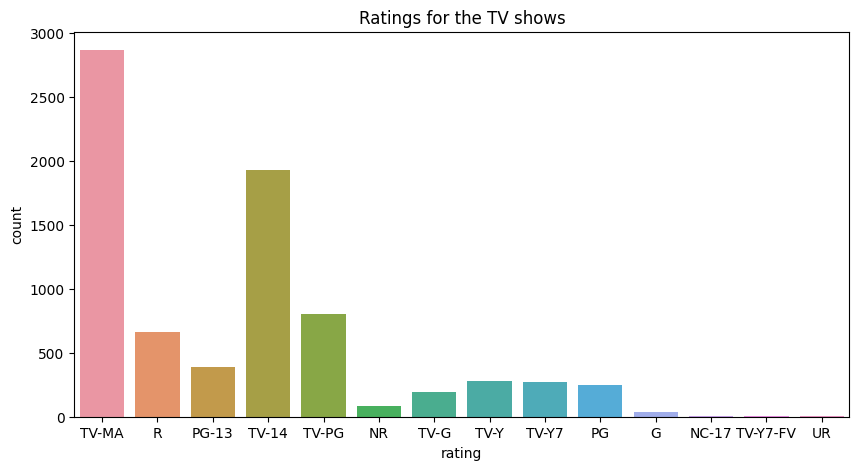

In [ ]:
#PLotting count plot for ratings for TV show
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=Netflix_Movies)
plt.title('Ratings for the TV shows')

Countplot() method is used to show the counts of observations in each categorical bin using bars.

From the above count plot inhave found that, TV-MA has the highest rating.

# Chart 4

Text(0.5, 1.0, 'Distribution by released year')

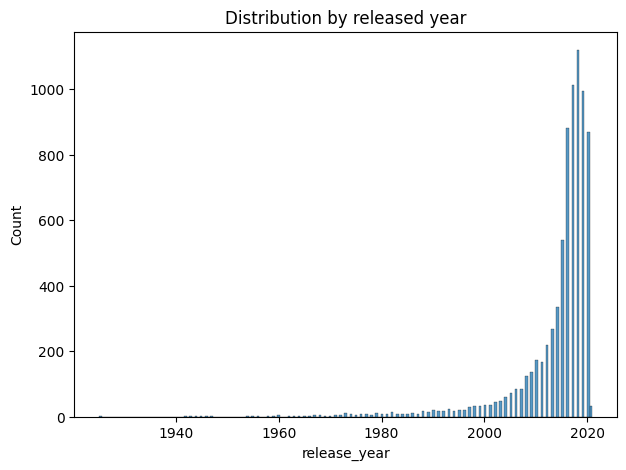

In [ ]:
#Visualising the year in which the movie or TV shows was released
plt.figure(figsize=(7,5))
sns.histplot(Netflix_Movies['release_year'])
plt.title('Distribution by released year')

In statistics, a histogram is a graphical representation of the distribution of data. The histogram is represented by a set of rectangles, adjacent to each other, where each bar represent a kind of data.


From the above histogram, i have found that from the year 2000 to 2020 more number of movies are released.

# Chart 5

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

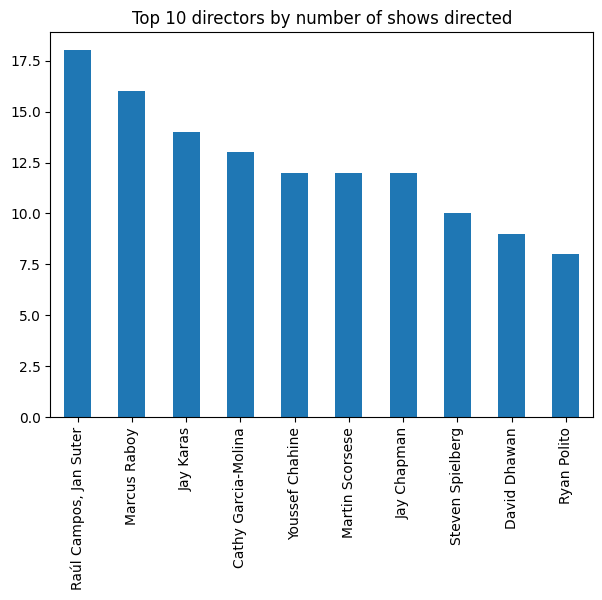

In [ ]:
#Top 10 directors in the dataset
plt.figure(figsize=(7,5))
Netflix_Movies[~(Netflix_Movies['director']=='unknown')].director.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 directors by number of shows directed')

In the above bar plot there are showing of top 10 directors by number of shows directed. From the bar plot i have found that Raul Campos and Jan Suter are the 1st among the 10 directors.

# **Date Preprocessing**

In [ ]:
#Using the original dataset for clustering since it doesnot require handling missing values
Dataset= Netflix_Movies.copy()

In [ ]:
Dataset.fillna('',inplace=True)

In [ ]:
#Combining all the clustering attributes into a single column

Dataset['clustering']= (Dataset['director'] + ' ' +
                        Dataset['cast'] + ' ' +
                        Dataset['country'] + ' ' +
                        Dataset['listed_in'] + ' ' +
                        Dataset['description'])

In [ ]:
#Selecting the 100 number of clusters for the dataset
Dataset['clustering'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

# **Remove Punctuation**

In [ ]:
#Function to remove punctuations
def remove_punctuation(text):
  '''a function for rmoving punctuation'''
  translator= str.maketrans('','',string.punctuation)
  #Return the text stripped of punctuation marks
  return text.translate(translator)

In [ ]:
#Removing punctuation marks
Dataset['clustering']= Dataset['clustering'].apply(remove_punctuation)

In [ ]:
#Selecting the 100 no of clusters for the dataset
Dataset['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing Non-ASCII Characters**

In [ ]:
#Function to remove non-ascii characters
def remove_non_ascii(words):
  """function to remove non-ASCII characters"""
  new_words= []
  for word in words:
    new_word= unicodedata.normalize('NFKD', word).encode('ascii','ignore').decode('utf-8','ignore')
    new_words.append(new_word)
  return new_words

In [ ]:
#Removing non-ascii characters
Dataset['clustering']= remove_non_ascii(Dataset['clustering'])

In [ ]:
#Selectiong the 100 no of clusters for the dataset
Dataset['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing Stop Words**

In [ ]:
#Extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sentences= stopwords.words('english')
#Displaying the stopwords
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
#Function to remove stopwords
def remove_stopwords(text):
  '''a function for removing the stopword'''
  #Removing the stopwords and lowercasing the selected words
  text= [word.lower() for word in text.split() if word.lower() not in sentences]
  #Joining the list of words with space separator
  return " ".join(text)

In [ ]:
#Removing stopwords
Dataset['clustering']= Dataset['clustering'].apply(remove_stopwords)

In [ ]:
#Selecting the 100 no of clusters for the dataset
Dataset['clustering'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

# **Lemmatization**

In [ ]:
#Funcrion to lemmatize thw corpus
def lemmatize_verbs(words):
  """Lemmatize verbs in list of tokenized words"""
  lemmatizer= WordNetLemmatizer()
  lemmas=[]
  for word in words:
    lemma= lemmatizer.lemmatize(word, pos='v')
    lemmas.append(lemma)
  return lemmas

In [ ]:
#Lemmatization
Dataset['clustering']= lemmatize_verbs(Dataset['clustering'])

In [ ]:
#Selecting the 100 no of clusters for the dataset
print(Dataset['clustering'][100])

rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system


# **Tokenization**

In [ ]:
#Creating a reference variable for class tokenizer
tokenizer= TweetTokenizer()


In [ ]:
#Apllying tokenization
Dataset['clustering']=Dataset['clustering'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
#Selecting the 100 no of tokenization for the dataset
Dataset['clustering'][100]

['rajkumar',
 'hirani',
 'aamir',
 'khan',
 'kareena',
 'kapoor',
 'madhavan',
 'sharman',
 'joshi',
 'omi',
 'vaidya',
 'boman',
 'irani',
 'mona',
 'singh',
 'javed',
 'jaffrey',
 'india',
 'comedies',
 'attending',
 'one',
 'indias',
 'premier',
 'colleges',
 'three',
 'miserable',
 'engineering',
 'students',
 'best',
 'friends',
 'struggle',
 'beat',
 'schools',
 'draconian',
 'system']

# **Vectorization**

In [ ]:
#Clustering tokens saved in  a variable
clustering_vectorization= Dataset['clustering']

In [ ]:
#Tokenization
def tokenizer(text):
  return text

In [ ]:
#Using tfidf vectorizer to vectorize the corpus
#max features= 20000 to prevent system from crashing
tfidf= TfidfVectorizer(tokenizer=tokenizer, stop_words='english',lowercase=False,max_features=20000)
x = tfidf.fit_transform(clustering_vectorization)

In [ ]:
#Dataset rows and columns count
x.shape

(7777, 20000)

In [ ]:
#Converting X into array form  for clustering
X= x.toarray()

In [ ]:
#Check the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **Reducing Dimensionality using PCA**

In [ ]:
#Using PCA to reduce dimensionality
pca= PCA(random_state=40)
pca.fit(X)

PCA(random_state=40)

Text(0, 0.5, 'Cumulative explained variance')

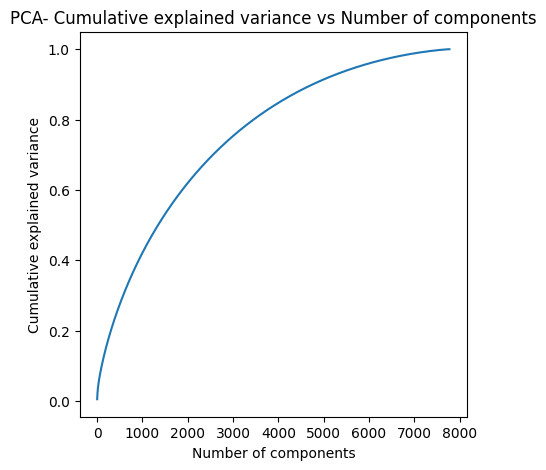

In [ ]:
#Explained variancefor different no of components
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA- Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
#Reducing the dimensions to 4000 using pca
pca= PCA(n_components=4000,random_state=40)
pca.fit(X)

PCA(n_components=4000, random_state=40)

In [ ]:
#Transformed features
x_pca= pca.transform(X)

In [ ]:
#Shape of transformed vectors
x_pca.shape

(7777, 4000)

# **Machine Learning Clustering Algorithms**

# **Model 1: K-Means Clustering**

Text(0, 0.5, 'WCSS')

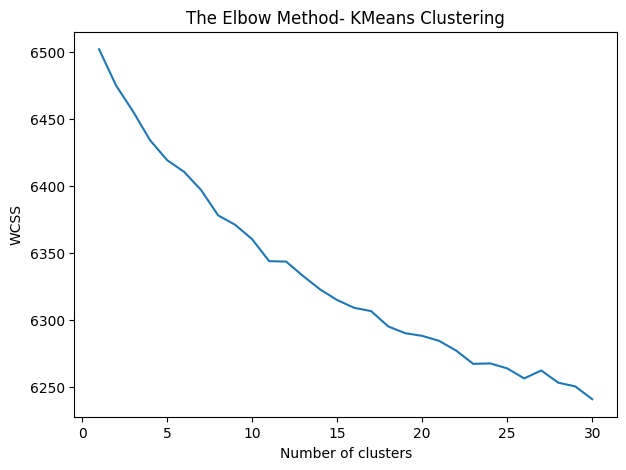

In [ ]:
#Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans= KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter= kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters= range(1,31)
plt.figure(figsize=(7,5))
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method- KMeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

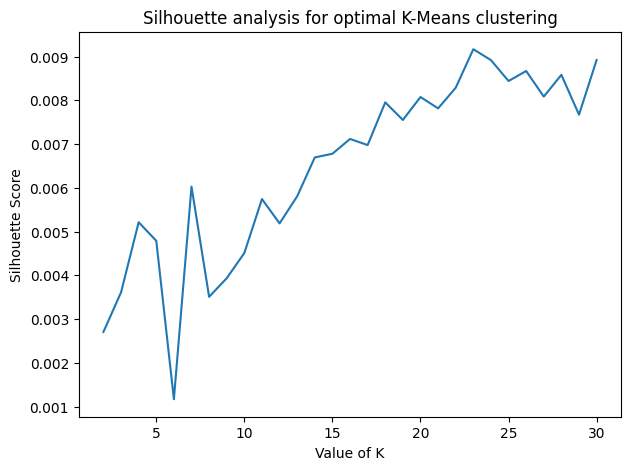

In [ ]:
#Plotting Silhouette score for dfrnt no of clusters
range_n_clusters= range(2,31)
silhouette_avg= []
for num_clusters in range_n_clusters:
  #Initialize kmeans
  kmeans= KMeans(n_clusters= num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels= kmeans.labels_

  #Silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(7,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Value of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette analysis for optimal K-Means clustering')
plt.show()

In [ ]:
#Clustering the data into 19 clusters
kmeans= KMeans(n_clusters=6,init='k-means++',random_state=40)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=40)

In [ ]:
#Adding a kmeans cluster number attribute
Dataset['kmeans_cluster']= kmeans.labels_

In [ ]:
#Evaluation metrics- distortion, Silhouette score
kmeans_distortion= kmeans.inertia_
kmeans_silhouette_score= silhouette_score(x_pca,kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6408.909689852696, 0.0062827520779124655)


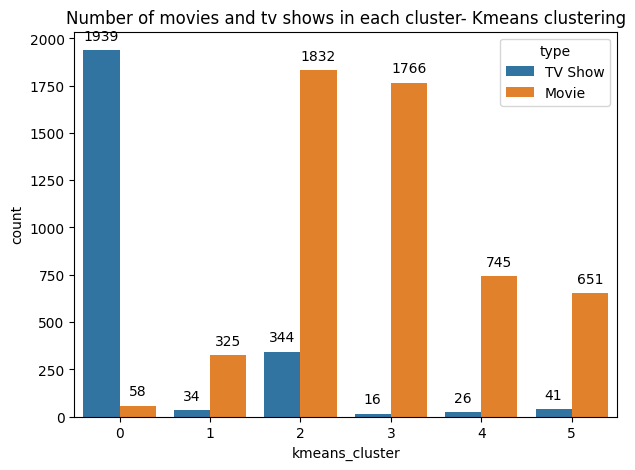

In [ ]:
#No of movies and tv shows in each cluster
plt.figure(figsize=(7,5))
q= sns.countplot(x= 'kmeans_cluster', data=Dataset, hue='type')
plt.title('Number of movies and tv shows in each cluster- Kmeans clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'),(i.get_x() + i.get_width() / 2., i.get_height()), ha= 'center', va='center', xytext= (0,10), textcoords='offset points')

In [ ]:
#Building a wordcloud for the movie descriptions
def kmeans_wordcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  #Iterate through the csv file
  for val in Dataset[Dataset['kmeans_cluster']==cluster_num].description.values:

      #typecast each val to string
      val= str(val)

      #split the value
      tokens= val.split()

      #Converts each token into lowercase
      for i in range(len(tokens)):
        tokens[i]= tokens[i].lower()

      comment_words += " ".join(tokens)+ " "

  wordcloud = WordCloud(width=500, height=500,
                      background_color='white',
                      stopwords= stopwords,
                      min_font_size=10).generate(comment_words)

# **Model 2: Hierarchical Clustering**

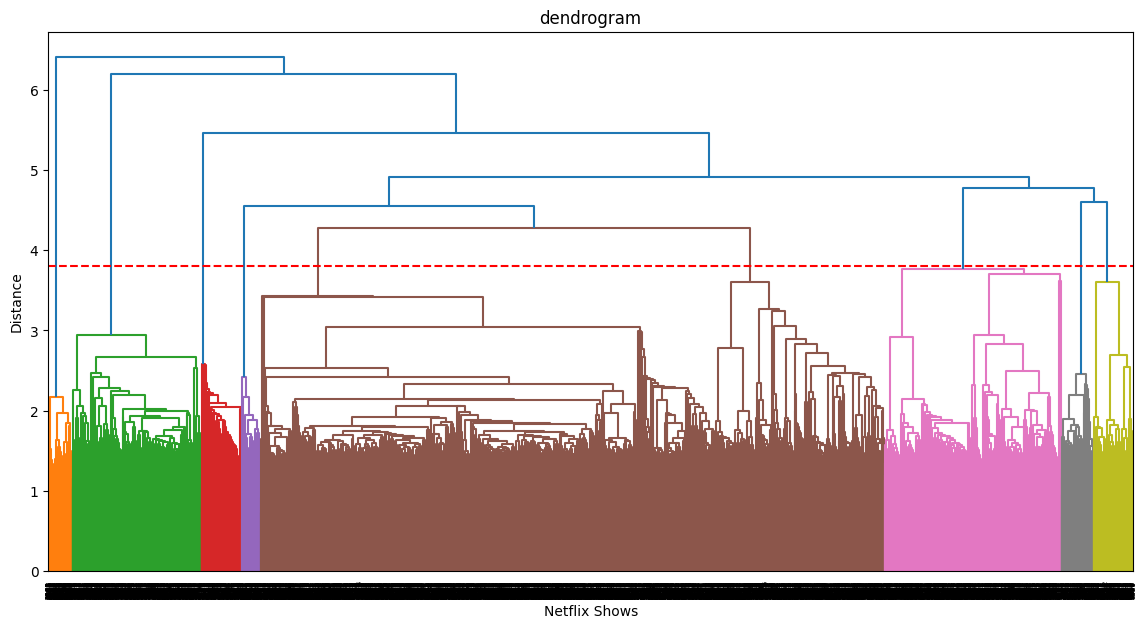

In [ ]:
#Building a dendrogram to decide on the number of clusters
plt.figure(figsize=(14,7))
dend= shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y=3.8, color='r', linestyle='--')

In [ ]:
#Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean',linkage='ward')
hierarchical.fit_predict(x_pca)

array([ 0,  0,  1, ...,  4,  4, 10])

In [ ]:
#Adding a kmeans clusters number attribute
Dataset['hierarchical_cluster']= hierarchical.labels_

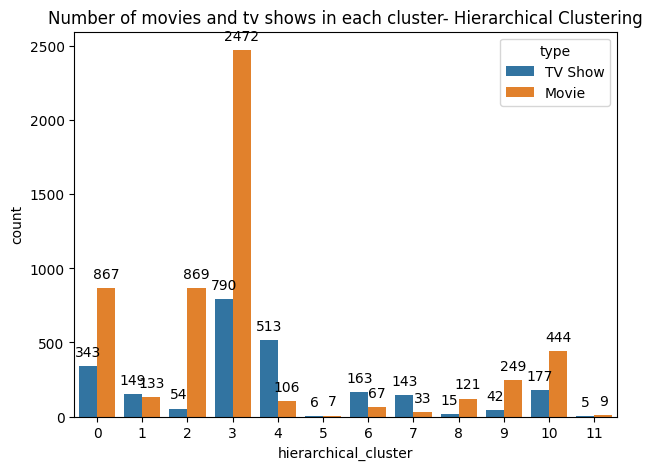

In [ ]:
#Number of movies and tv shows in each cluster
plt.figure(figsize=(7,5))
q= sns.countplot(x='hierarchical_cluster',data=Dataset, hue='type')
plt.title('Number of movies and tv shows in each cluster- Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'),(i.get_x() + i.get_width() / 2., i.get_height()), ha= 'center', va='center', xytext= (0,10), textcoords='offset points')

In [ ]:
#Building a wordcloud for the movie descriptions
def hierarchical_wordcloud(cluster_num):
 comment_words = ''
 stopwords = set(STOPWORDS)

 #Iterate through the csv file
 for val in Dataset[Dataset['hierarchical_cluster']==cluster_num].description.values:

     #typecast each val to string
     val= str(val)

     #split the value
     tokens= val.split()

     #Converts each token into lowercase
     for i in range(len(tokens)):
       tokens[i]= tokens[i].lower()

     comment_words += " ".join(tokens)+ " "

 wordcloud = WordCloud(width=500, height=500,
                        background_color='white',
                        stopwords= stopwords,
                        min_font_size=10).generate(comment_words)

# **Using Content Based Recommender System**

In [ ]:
#Changing the index of the Netflix_Movies from show id to show title
Dataset['shoe_id']= Dataset.index

In [ ]:
#Converting tokens to string
def convert(lst):
  return ''.join(lst)

Dataset['clustering']= Dataset['clustering'].apply(lambda x: convert(x))

In [ ]:
#Setting title of movies/Tv shows as index
Dataset.set_index('title', inplace= True)

In [ ]:
#Count Vectorizer
CV= CountVectorizer()
converted_matrix= CV.fit_transform(Dataset['clustering'])

In [ ]:
#Cosine Similarity
cosine_similarity= cosine_similarity(converted_matrix)

In [ ]:
#Dataset rows and columns count
cosine_similarity.shape

(7777, 7777)

In [ ]:
#Developing a function to get 10 recommendations for a show
indices= pd.Series(Dataset.index)

def Dataset_10(title, cosine_sim= cosine_similarity):
  try:
    recommend_content= []
    idx= indices[indices==title].index[0]
    series= pd.Series(cosine_sim[idx]).sort_values(ascending= False)
    top10= list(series.iloc[1:11].index)
    #List with the titlesof the best 10 matching movies
    for i in top10:
      recommend_content.append(list(Dataset.index)[i])
    print("If you liked''"+title+"', ypu may also enjoy:\n")
    return recommend_content

  except:
    return 'invalid Entry'

In [ ]:
#Recommendations for ' Man Called God'
Dataset_10('A Man Called God')

If you liked''A Man Called God', ypu may also enjoy:



['3%',
 'Ride Like a Girl',
 'Richie Rich',
 'Richard Pryor: Live in Concert',
 'Rich in Love',
 'Ricardo Quevedo: Los amargados somos más',
 'Ricardo Quevedo: Hay gente así',
 "Ricardo O'Farrill: Abrazo navideño",
 "Ricardo O'Farrill Abrazo Genial",
 'Rica, Famosa, Latina']

In [ ]:
#Recommendations for 'Peaky Blinders'
Dataset_10('Peaky Blinders')

If you liked''Peaky Blinders', ypu may also enjoy:



['3%',
 'Rhyme Time Town',
 'Ricky Gervais: Humanity',
 'Richie Rich',
 'Richard Pryor: Live in Concert',
 'Rich in Love',
 'Ricardo Quevedo: Los amargados somos más',
 'Ricardo Quevedo: Hay gente así',
 "Ricardo O'Farrill: Abrazo navideño",
 "Ricardo O'Farrill Abrazo Genial"]

In [ ]:
#Recommendations for 'Stranger Things'
Dataset_10('Stranger Things')

If you liked''Stranger Things', ypu may also enjoy:



['3%',
 'Rezeta',
 'Ricky Gervais: Humanity',
 'Richie Rich',
 'Richard Pryor: Live in Concert',
 'Rich in Love',
 'Ricardo Quevedo: Los amargados somos más',
 'Ricardo Quevedo: Hay gente así',
 "Ricardo O'Farrill: Abrazo navideño",
 "Ricardo O'Farrill Abrazo Genial"]

# **# Conclusion**

1. In this project, we worked on a text clustering problem where in we had to  classify / group the netflix shows into certain clusters such that the shows within the clusters are similar to each other and the shows in different clusters are dissimilar to each other.
2. The data contains about 7787 rows and 12 columns. We began by dealing with the dataset missing values and doing EDA.
3. It was found that netflix hosts more mov ies than tv shows on its platform, and the total number of shows added on netflix is growing exponentially. Also majority of the shows were produced in the United States, and the majority of the shows on the netflix were created for adults and young adults age group.
4. Once obtained the required insights from the EDA , we started with preprocessing the text data by removing punctuation and stopwords.This filtered data is passed through TF-IDF vectorizer since we are conducting a text based clustering and the model needs the data to be vectorized in order to predict the desired result.
5. It was decided to cluster the data based on the attributes: diretor , cast , country , genre and description. The values in these attributes were tokenized , preprocessed and then vectorized using TF-IDF vectorizer.
6. Through TF-IDF vectorization , we created a total of 20,000 attributes. We used principal component analysis(PCA) to handle the curse of dimensionality.4000 components were able to capture more than 80% of variance, and hence the number of components were restricted to 4000. We first built clusters using the kmeans clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the albo method and silhouette score analysis.
7. Then clusters were bulit using the agglomerative clustering algorithm, and the optimal number of cluters came out to be 12. This was o btained after visualizing the dendrogram.
8. A content based recommender system was build using the similarity matrix obatined after using cosine similarity.This recommender system will make 10 recommendation to the user based on the type of the show they watched.